# Agrupamiento Jerárquico

In [3]:
#Cargamos las librerías de Python que nos servirán para todo esto
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import linear_model,model_selection
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score,precision_score,silhouette_score, confusion_matrix

In [5]:
data_frame = pd.read_csv("wine_copy.csv",sep=",")
data_frame.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [6]:
data_frame.shape

(150, 14)

In [7]:
data_frame.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [8]:
### DATOS DE MUESTRA ###
#Se selecionan unos datos al azar para posteriormente verificar el clúster 
#al que pertenecen
indices = [26, 55, 120]
muestras = pd.DataFrame(data_frame.loc[indices], 
                       columns = data_frame.keys()).reset_index(drop = True)

data = data_frame.drop(indices, axis = 0)

In [9]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(data_frame[["Color_Intensity","Hue"]])
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [10]:
#Se determina las variables a evaluar
X = data_escalada

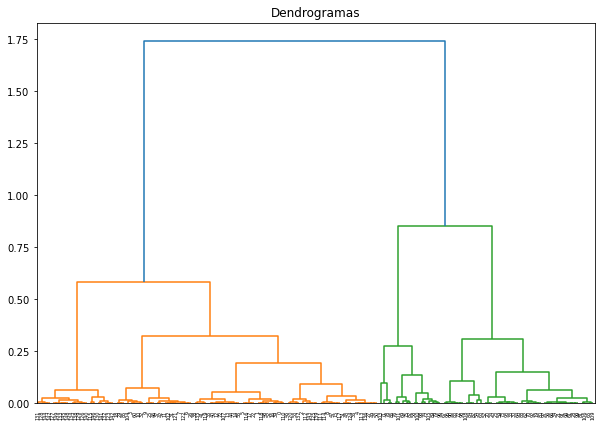

In [11]:
#Se gráfica el dendrograma para obtener el número de clúster
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogramas") 
dendrograma = shc.dendrogram(shc.linkage(X, method = 'ward'))

# Imagen de recorte
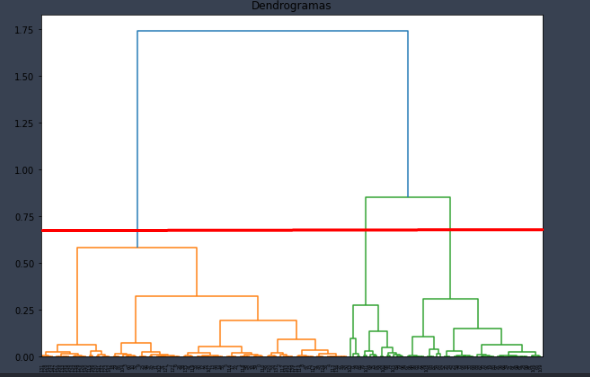

In [16]:
#Obtenido el número de clúster se procede a definir los clústeres 
from sklearn.cluster import AgglomerativeClustering

In [17]:
#Se define el algoritmo junto con el valor de K
algoritmo = AgglomerativeClustering(n_clusters = 3, 
                                    affinity='euclidean', linkage='ward')  

In [18]:
#Se entrena el algoritmo
algoritmo.fit(X)
pred1 = algoritmo.fit_predict(X)

In [19]:

#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.fit_predict(muestras_escalada)

for i, pred in enumerate(muestra_prediccion):
    print( "Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 2
Muestra 1 se encuentra en el clúster: 1
Muestra 2 se encuentra en el clúster: 0


# Analisis Comparativo